_________
# **Data Visualization using Seaborn**
____

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Example-1: Scatter plot

[149 153 159 162 165 167 169 171 178 180]
[59 63 65 68 70 77 80 86 91 95]


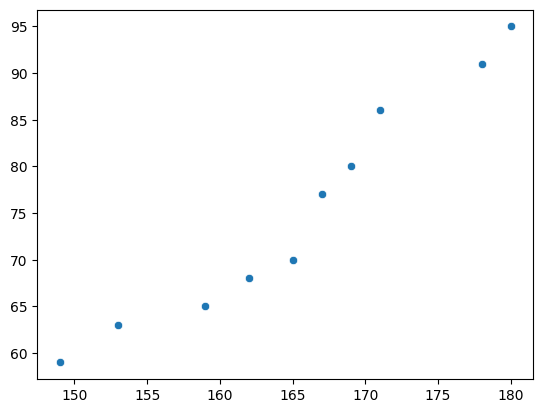

In [2]:
# Creating a sample dataset (arrays) for plotting
ht = np.array([169, 167, 149, 165, 159, 180, 178, 153, 162, 171])
height = np.sort(ht)
wt = np.array([86, 70, 59, 95, 80, 63, 77, 65, 91, 68])
weight = np.sort(wt)

print(height)
print(weight)

sns.scatterplot(x=height, y=weight)
plt.show()

### Example-2: Counting plot
- Its a rather specific kind of bar chart representing the frequency of each category.
- Barplot allows comparing a numerical data with respect to a categorical data.
- The `Countplot` is more intended to count the occurrences of categorical data.

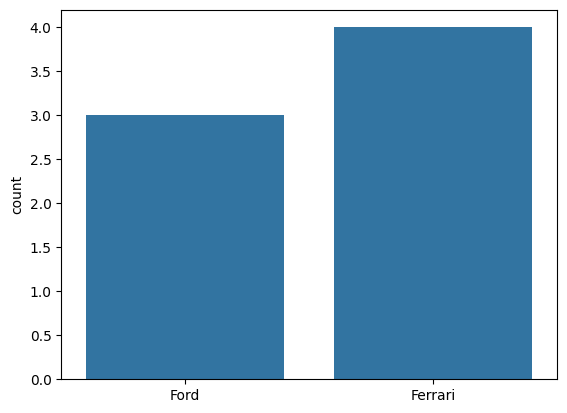

In [3]:
car_brand = ["Ford", "Ferrari", "Ferrari", "Ferrari", "Ferrari","Ford","Ford"]
sns.countplot(x=car_brand)
plt.show()

____
## Analyzing a dataset
Using the `countries-of-the-world` dataset to plot & discover interesting insights

In [4]:
countries = pd.read_csv("./course_datasets/seaborn_datasets/countries-of-the-world.csv")
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

**Q:Create a scatter plot of GDP (gdp) vs. number of phones per 1000 people (phones). Use the columns as two separate lists**

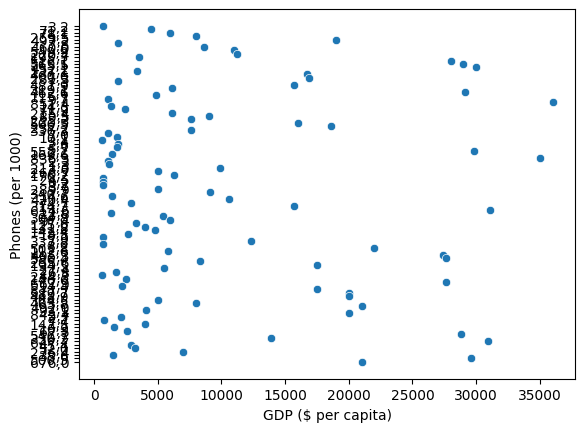

In [6]:
# Creating the two lists for inputs
gdp = countries["GDP ($ per capita)"].head(100).squeeze()
phones = countries["Phones (per 1000)"].head(100).squeeze()

sns.scatterplot(x=gdp, y=phones)
plt.show()

> ### Some data cleaning was required
> The plot is so cluttered because there are missing values for some rows in both the lists - especially in Phones column, the numerical values contain the `, (comma)` separator instead of a decimal point. <br>
> So We'll first replace `, (comma)` with `. (decimal)` & then convert dtype to float using `astype()` 

In [7]:
countries["Phones (per 1000)"].str.contains(',')

0      True
1      True
2      True
3      True
4      True
       ... 
222    True
223     NaN
224    True
225    True
226    True
Name: Phones (per 1000), Length: 227, dtype: object

Converting the Phones column to String

In [8]:
countries["Phones (per 1000)"].astype("str")
countries["Phones (per 1000)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 227 entries, 0 to 226
Series name: Phones (per 1000)
Non-Null Count  Dtype 
--------------  ----- 
223 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


Replacing the `,` to `.` and recasting the column to `float` dtype

In [9]:
countries["Phones (per 1000)"] = countries["Phones (per 1000)"].str.replace(',','.').astype("float")
countries["Phones (per 1000)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 227 entries, 0 to 226
Series name: Phones (per 1000)
Non-Null Count  Dtype  
--------------  -----  
223 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


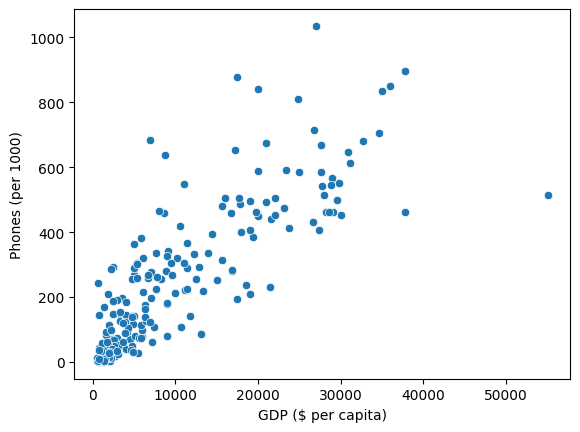

In [10]:
phones = countries["Phones (per 1000)"].squeeze()
gdp = countries["GDP ($ per capita)"].squeeze()
sns.scatterplot(x=gdp, y=phones)
plt.show()

### Using a better alternative
Converting all commas to decimals during the time of loading the dataframe itself

In [11]:
new_countries = pd.read_csv("./course_datasets/seaborn_datasets/countries-of-the-world.csv", index_col=0, decimal=',')
new_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, Afghanistan  to Zimbabwe 
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              227 non-null    object 
 1   Population                          227 non-null    int64  
 2   Area (sq. mi.)                      227 non-null    int64  
 3   Pop. Density (per sq. mi.)          227 non-null    float64
 4   Coastline (coast/area ratio)        227 non-null    float64
 5   Net migration                       224 non-null    float64
 6   Infant mortality (per 1000 births)  224 non-null    float64
 7   GDP ($ per capita)                  226 non-null    float64
 8   Literacy (%)                        209 non-null    float64
 9   Phones (per 1000)                   223 non-null    float64
 10  Arable (%)                          225 non-null    float64
 11  Crops (%)                        

**Q: Change the scatter plot so it displays the percent of the population that can read and write (percent_literate) on the y-axis.**

In [12]:
new_gdp = new_countries["GDP ($ per capita)"].squeeze()
new_literacy = new_countries["Literacy (%)"].squeeze()

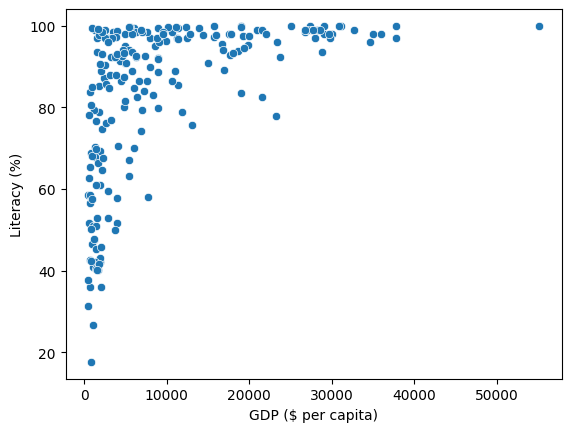

In [13]:
sns.scatterplot(x=new_gdp, y=new_literacy)
plt.show()

>While this plot does not show a linear relationship between GDP and percent literate, countries with a lower GDP do seem more likely to have a lower percent of the population that can read and write.

**Q: how many countries are in each region of the world**

In [14]:
new_countries["Region"].value_counts()

Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Region'>

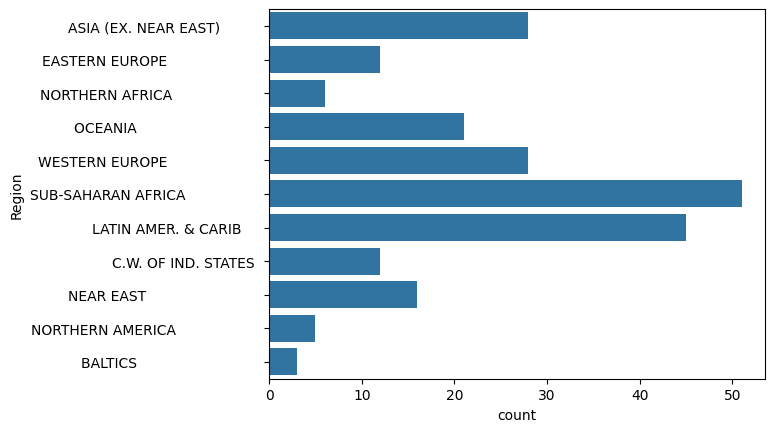

In [15]:
sns.countplot(data=new_countries, y="Region")

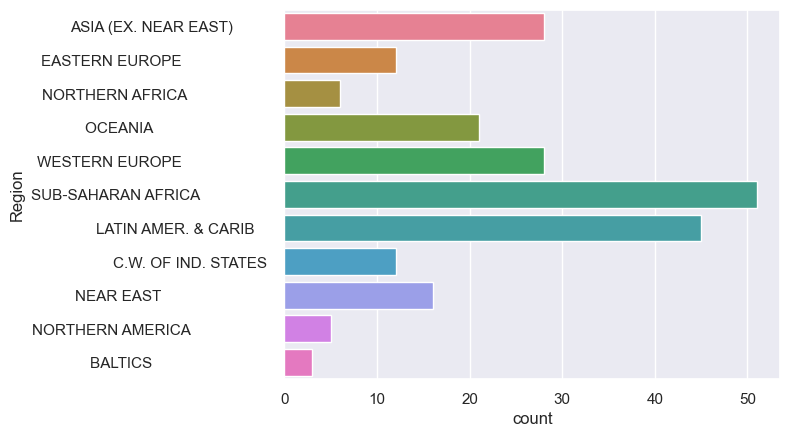

In [16]:
# A more beautified version -- setting a seaborn theme & using the hue argument to make the plot distinguishing by color
sns.set_theme(style="darkgrid")  # or "whitegrid", "dark", etc.
sns.countplot(data=new_countries, y="Region",hue="Region")
plt.show()

> As observed from above plot , the dataframe contains a very large no. of Sub-Saharan African countries.
___
# Using pandas + Seaborn
> Seaborn libraries mostly use the syntax : `sns.plot`(`x=`, `y=`, `data=`)
- Many of the low-level arguments we used to pass when using matplotlib are taken care of by the abstractions in seaborn.
- One big advantage is the auto-labelling of the x & y axes based on the columns plotted in each of these axes.
- However it needs to be ensured that the dataframe used in the plots is **'tidy'** -- meaning each row is a distinct observation & that each column value is a valid value.
- This why data pre-processing is an essential & critical step when conducting any EDA or even data visualization tasks

### Using the `hue` argument to add a third variable
Also , making use of `sns.load_dataset()` to load a default dataset that comes included with seaborn.

In [17]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


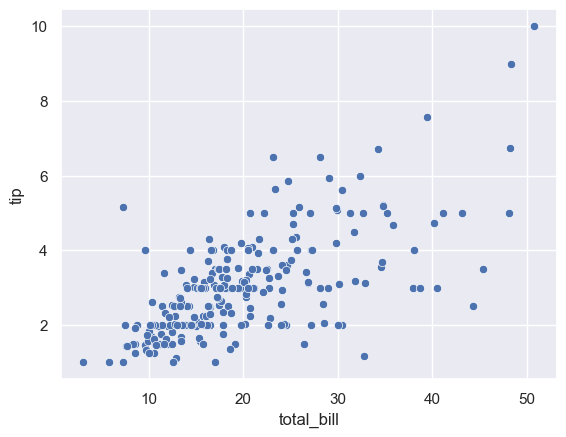

In [18]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

We can add a third variable - for example , whether to distinguish whether customer was a smokr/ non-smoker - using the `hue` parameter
- This argument is available in multiple plot types in seaborn
- **NOTICE how the legend is also added automatically when `hue` argument is used**
- the order of coloring can be specified by passing a list using `hue_order`

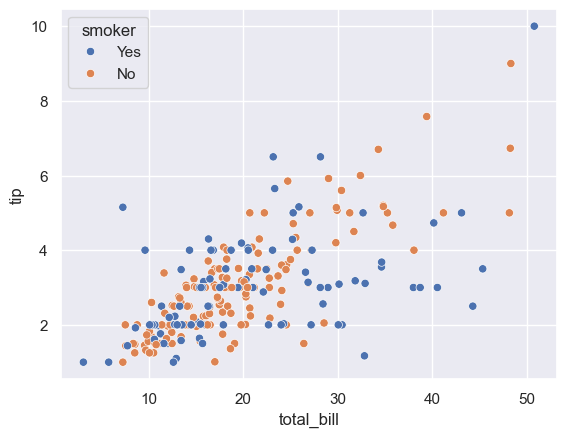

In [19]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker")
plt.show()

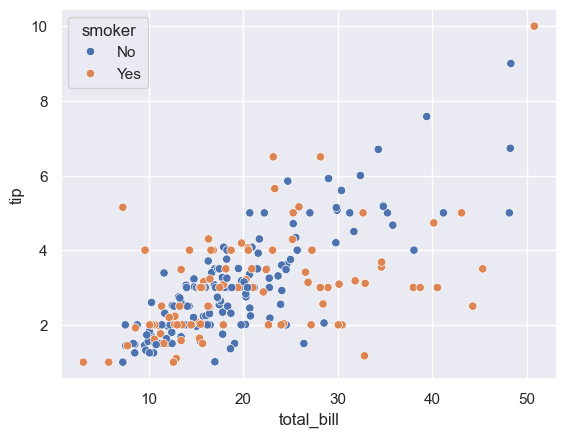

In [20]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker", hue_order=["No", "Yes"])
plt.show()

### Specifying hue colors
Colors of each variable can be contorlled by **passing a dictionary** into the `palette` parameters 
- The color names that are defined under matplotlib can be called directly by name. But different colors can be specified using the HEX code 

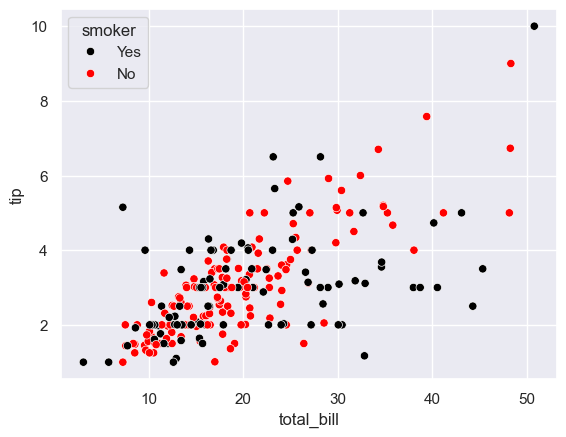

In [21]:
hue_colors = {"No": "red", "Yes": "black"}

sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker", palette=hue_colors)
plt.show()

### Using `hue` to for other plot types - e.g. `countplot()`
Counting Smokers / Non-smokers & also distinguishing based on gender

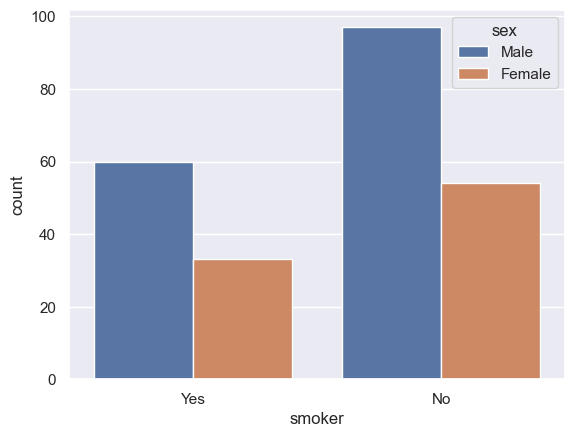

In [22]:
sns.countplot(x="smoker", data=tips, hue="sex")
plt.show()

> Thus we observe that males outnumber females in both smoking & non-smokking categories

____
# Relational plots in seaborn
The `relplot()` funtion offers two types of relational plotting -- `scatterplot()` & `lineplot()`
<br>

Apply the `col`, `row` & arguments on the `tips` dataset to create subplots for different categories into which the data can be divided for more analysis & insights.
## 1. Scatter plots using `relplots()`

In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Using `col` argument to create multiple columns of subplots
Helps create subplots side-by-side

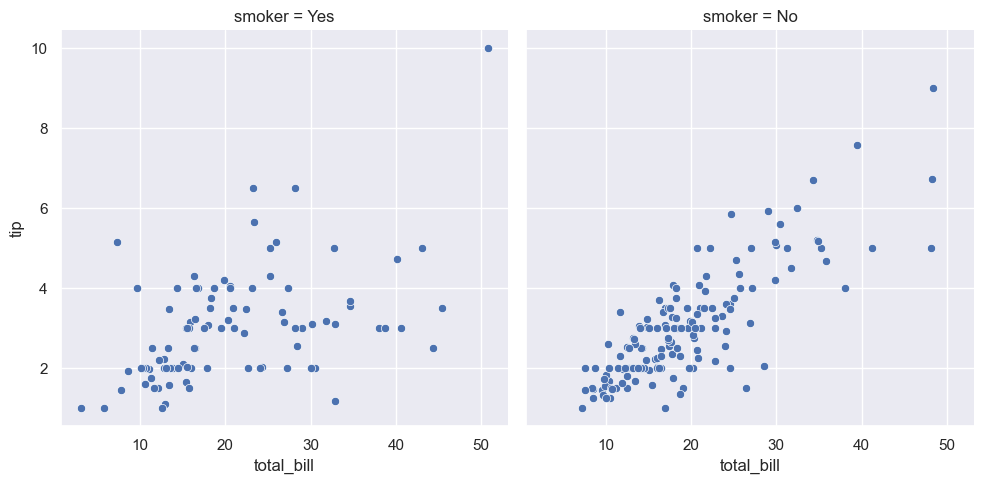

In [24]:
# Creating a 1 X 2 relational plot for distinguish the tipping behaviours of smokers & non-smokers

sns.relplot(x="total_bill", y="tip", data=tips, col="smoker")
plt.show()

### Using `row` argument to create multiple rows of the subplots
Helps stack subplots one-below-another

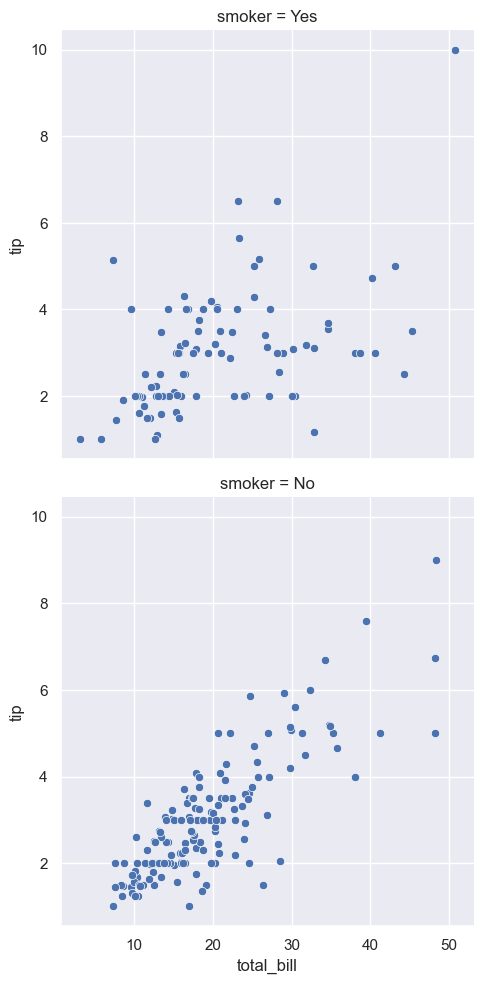

In [25]:
# Creating a 2 X 1 relational plot for distinguish the tipping behaviours of smokers & non-smokers

sns.relplot(x="total_bill", y="tip", data=tips, row="smoker")
plt.show()

### Creating a 2 X 2 plot to distinguish between smokers/ non-smokers at different times of the day 
(i.e whether lunch or dinner time)
- Using `col` and `row` arguments at the same time

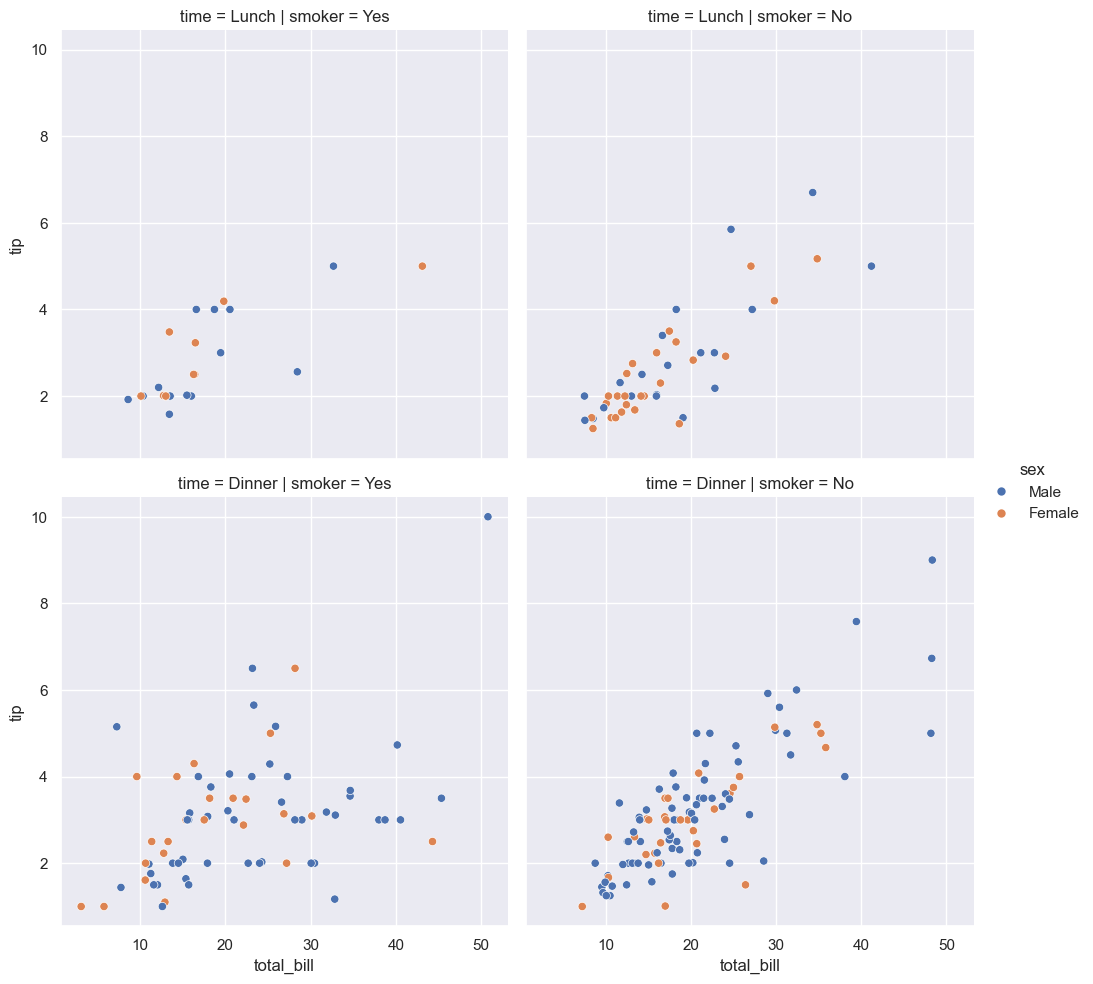

In [26]:
# Creating a 2 X 2 plot to distinguish betwn smokers/ non-smokers + time of the day
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="smoker", row="time",hue="sex")
plt.show()


### Creating multiple sub-plots to plot tipping behaviours at different times of the day


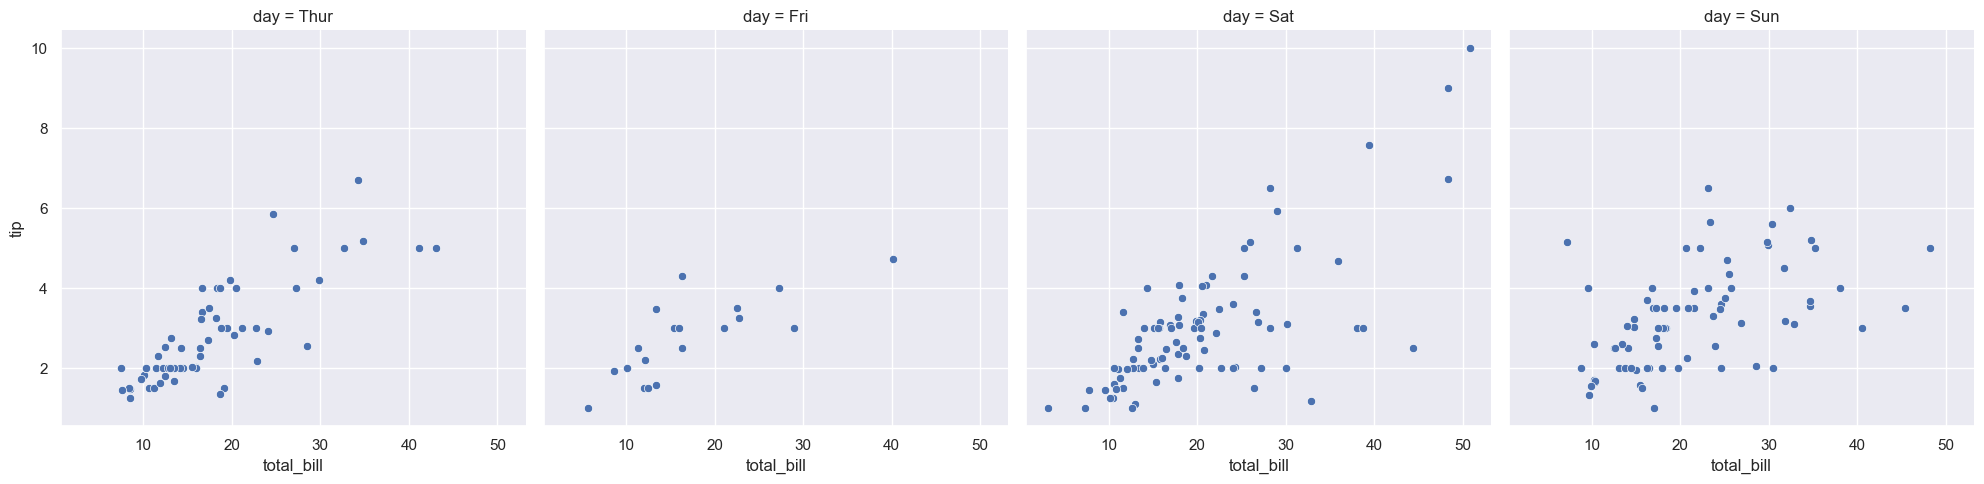

In [27]:
# Creating a 4 subplots to plot tipping behaviours at different times of the day
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day")
plt.show()


### Use `col_wrap` to specify no. of subplots per row
this will create a 2X2 subplot

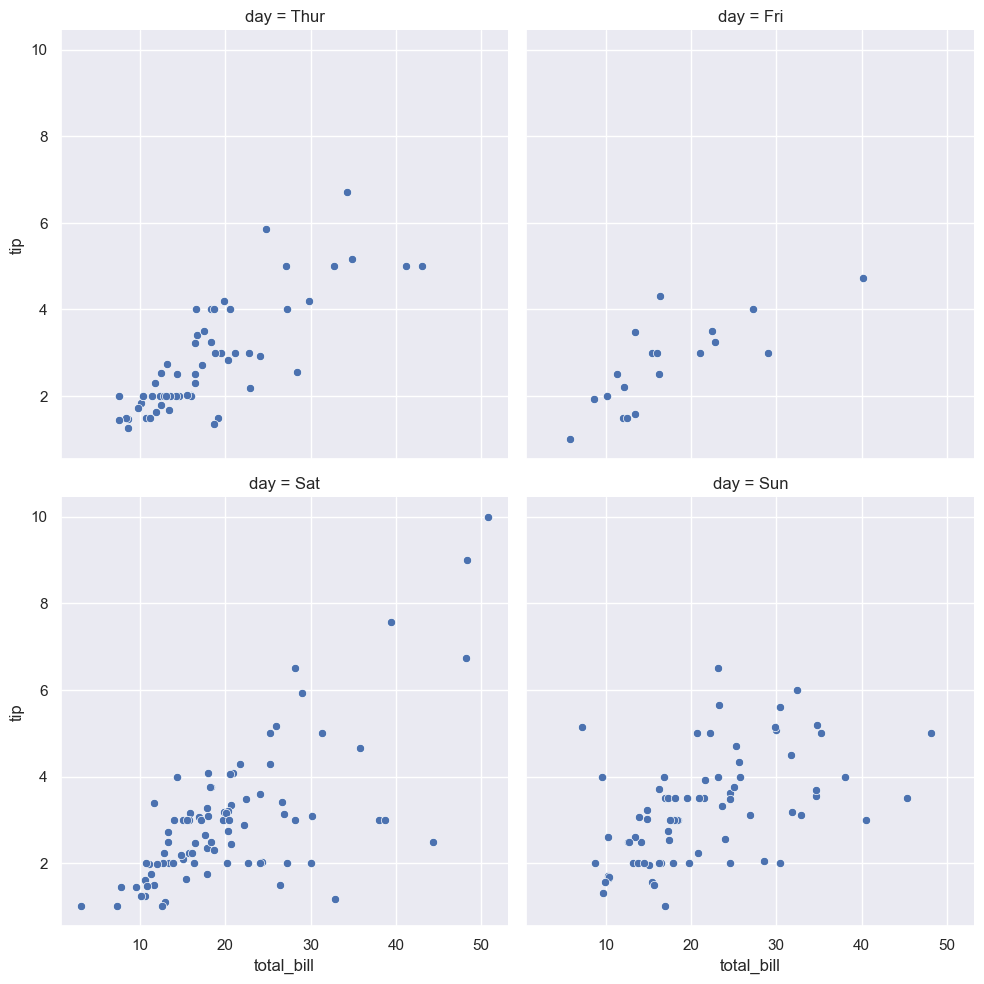

In [28]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day", col_wrap=2)
plt.show()

The `hue` argument can be used once again to 

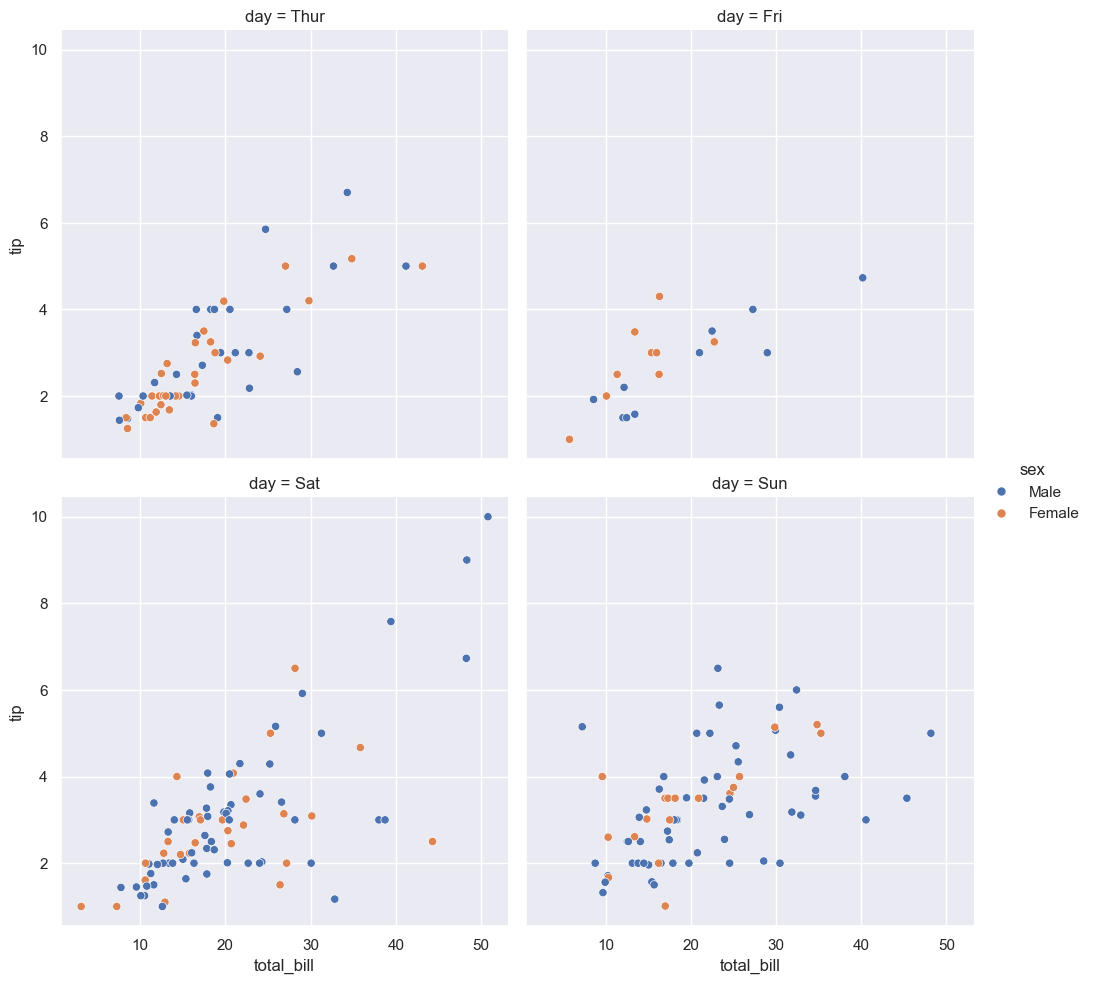

In [30]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day", col_wrap=2,hue="sex")
plt.show()

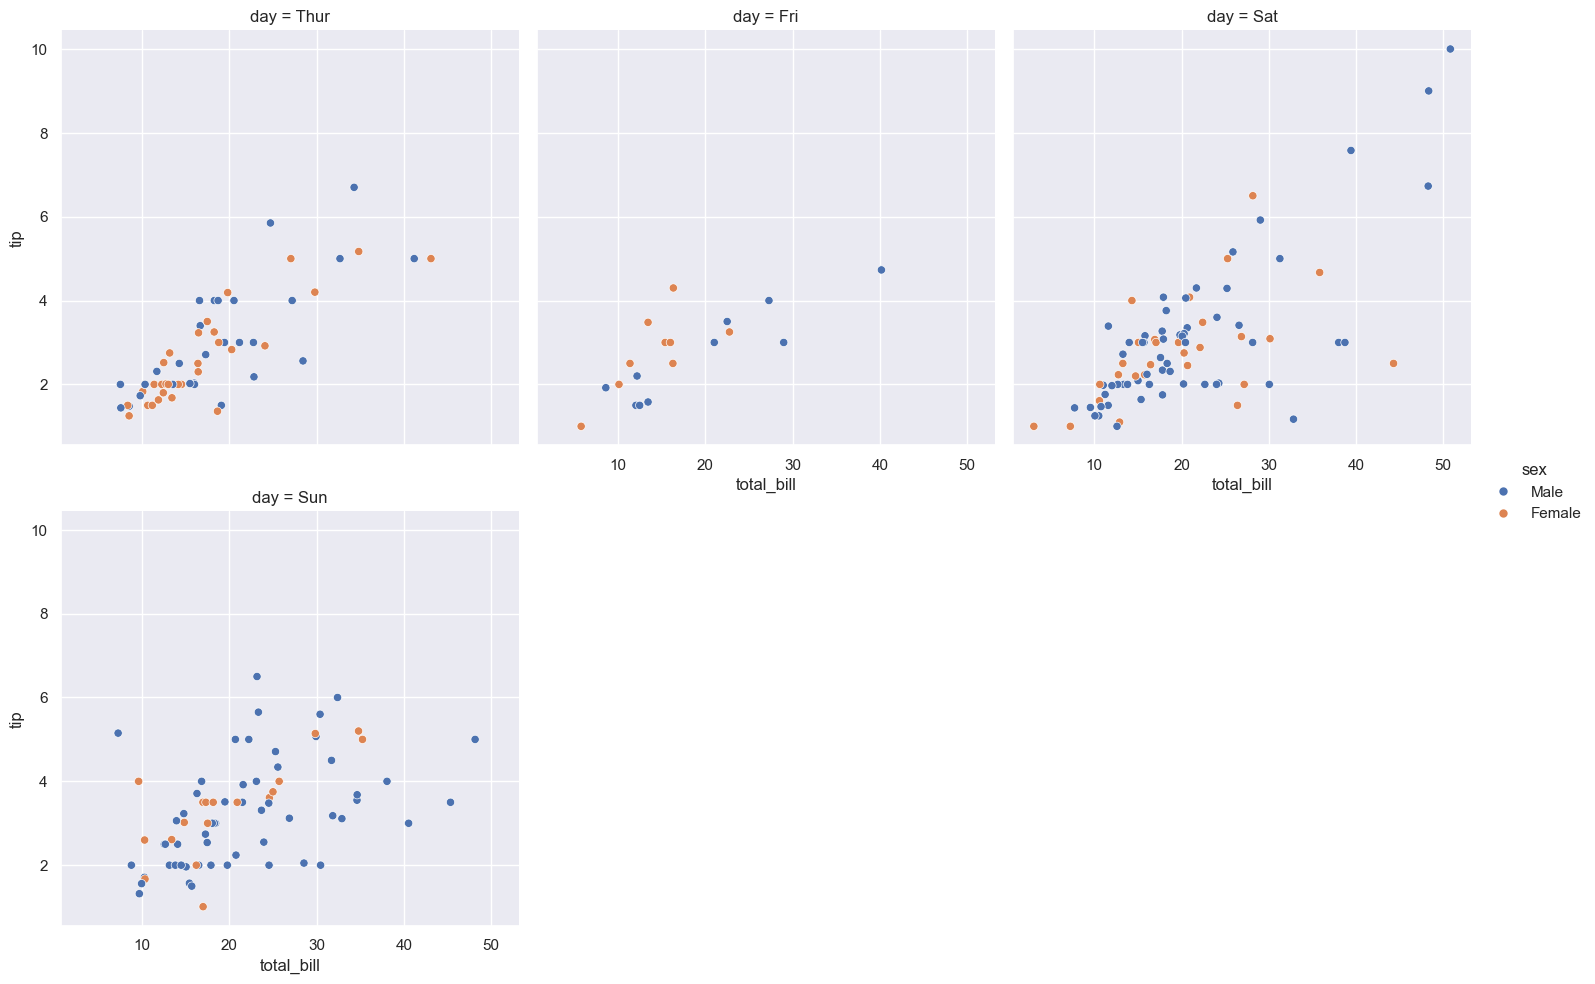

In [59]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day", col_wrap=3,hue="sex")
plt.show()

___
## Customizing scatterplots
Learining of additional methods to further customize relational plots. Applies to both -- `sns.scatterplot()` and `sns.relplot()`
### Cusotmizing point style using the `size`, `style` , `alpha` arguments


In [33]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


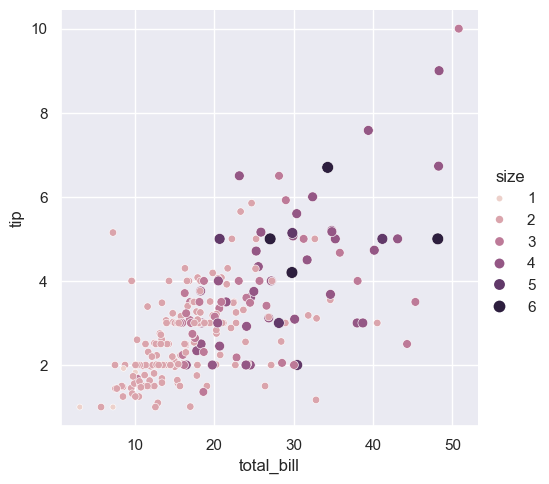

In [35]:
# Using the size AND hue arguments to differentiate based onthe size of the tipping amount
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", size="size",hue="size")
plt.show()

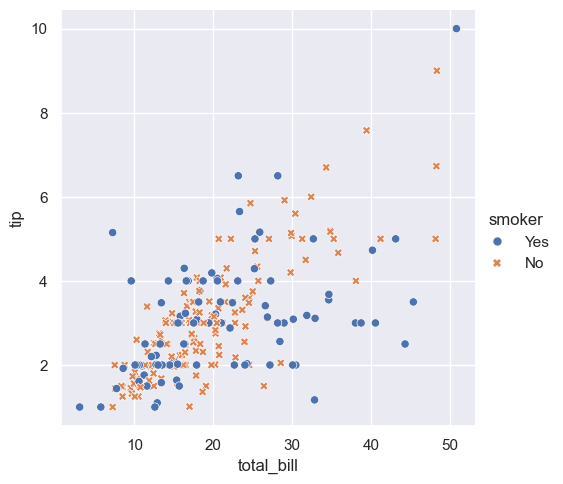

In [37]:
# Using the style AND hue arguments to differentiate betweel smoker/ non-smoker
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", style="smoker", hue="smoker")
plt.show()

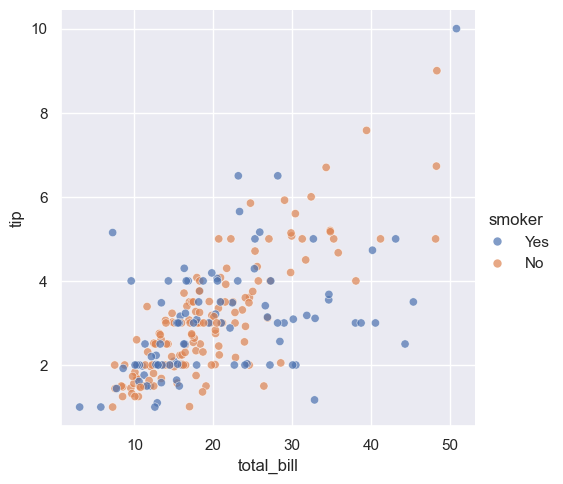

In [48]:
# Plotting to distinguish tipping behaviours of smokers/ non-smokers
# Also using the alpha argument to add some transparency to the points to make overalapping points appear less cluttered
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", hue="smoker",alpha=0.7)
plt.show()

___
## Test Questions
Us of the `mpg` dataset that contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.<br>
<br>
>What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has?

In [50]:
mpg = pd.read_csv("./course_datasets/seaborn_datasets/mpg.csv")
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**Q: Use `relplot()` and the mpg DataFrame to create a scatter plot with "`horsepower`" on the x-axis and "`mpg`" on the y-axis. Vary the size of the points by the number of cylinders in the car ("`cylinders`").**

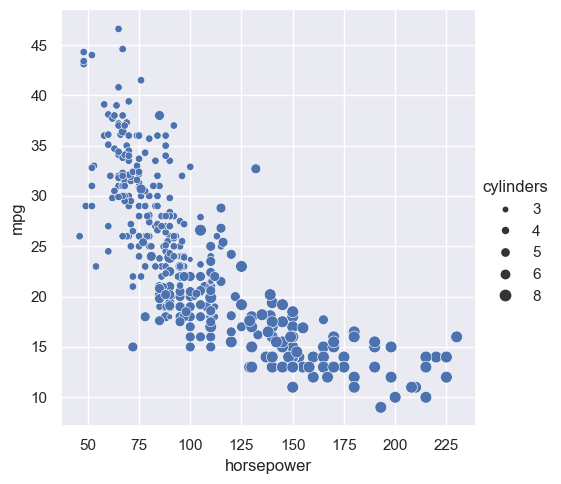

In [54]:
sns.relplot(x="horsepower", y="mpg" , data=mpg, size="cylinders",kind="scatter")
plt.show()


**Q: To make this plot easier to read, use `hue` to vary the color of the points by the number of cylinders in the car ("`cylinders`").**

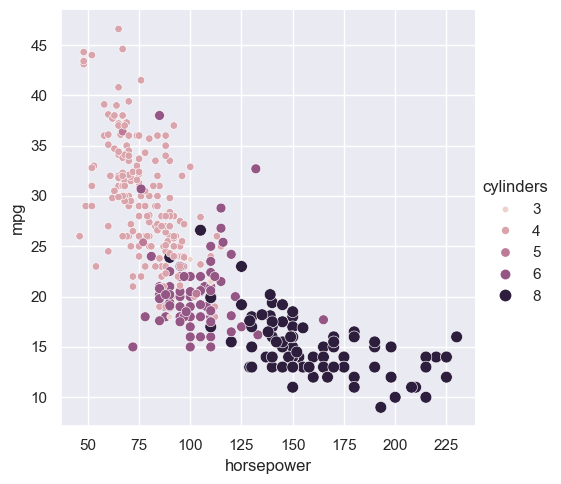

In [55]:
sns.relplot(x="horsepower", y="mpg", data=mpg, size="cylinders", kind="scatter", hue="cylinders")
plt.show()

> Hence its observed that Cars with a higher HP tend to get a comparatively lower number of miles per gallon. They also tend to have a higher number of cylinders.

> Next moving onto exploring the relationship a car's acceleration ("`acceleration`") and its fuel efficiency ("`mpg`"). We try to answer -- Do these properties vary by country of origin ("`origin`")?
<br>

**Q: Use `relplot()` and the mpg DataFrame to create a scatter plot with "`acceleration`" on the x-axis and "`mpg`" on the y-axis. Vary the style and color of the plot points by country of origin ("`origin`").**

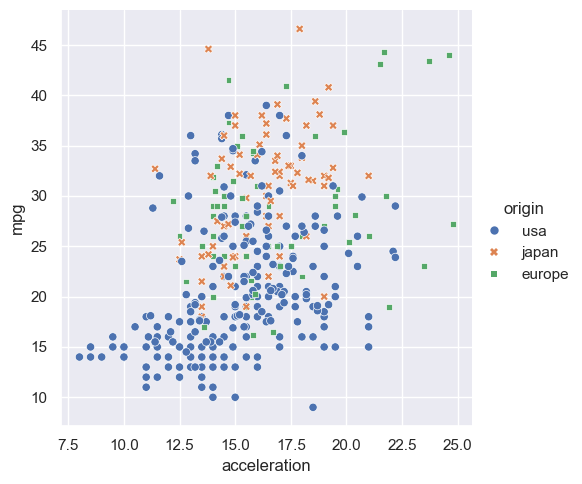

In [57]:
sns.relplot(x="acceleration", y="mpg", data=mpg, kind="scatter", style="origin", hue="origin")
plt.show()

> Based on the observations,
>- it seems that cars from the USA tend to have higher acceleration but give a lower mileage (mpg) compared to cars from the other 2 countries.
>- Europe seems to have car models that give outstanding mileage even coupled with high acceleration. 
>- Some car models of Japanese make have exceptionally high mileage with even moderate acceleration.

___
## 2. Lineplots using `relplot()`
- Subgrouping is done using the `style` parameter.
- Point level customizination is possible using `hue`, `markers`,  `dashes` arguments.
- Confidence interval can also be enabled / disabled using the `errorbar` parameter.

In [67]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

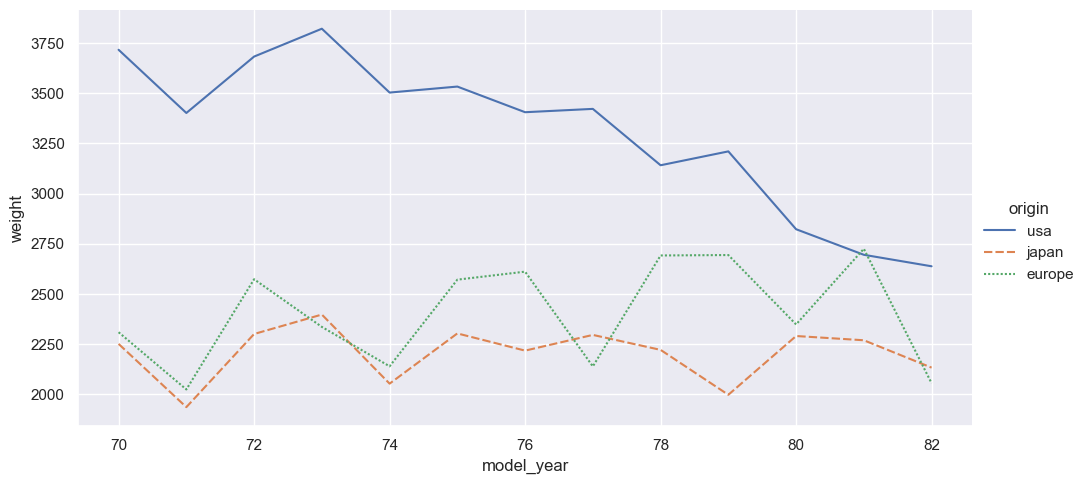

In [70]:
mpg.head()
sns.relplot(x="model_year", y="weight", data=mpg, kind="line",aspect=2, hue="origin", style="origin", errorbar=None)
plt.show()

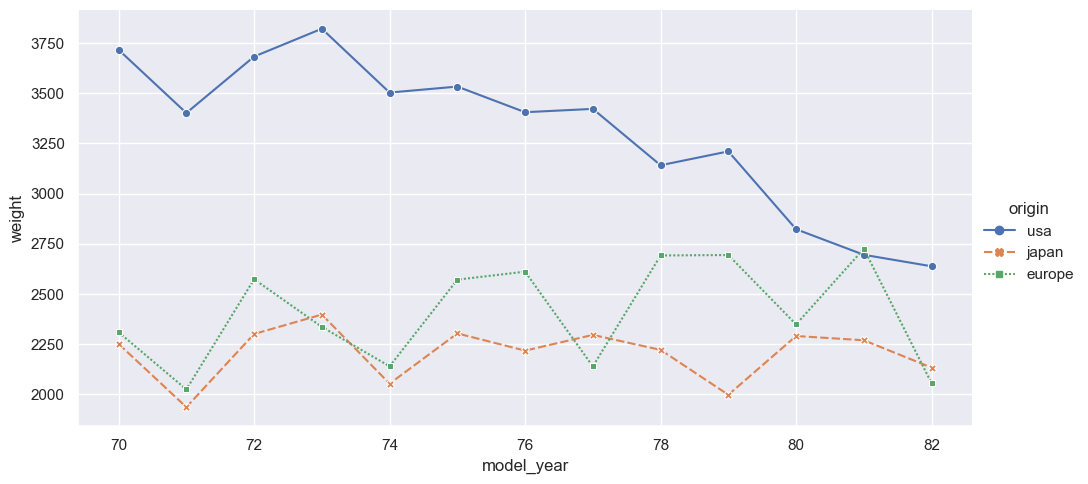

In [72]:
mpg.head()
sns.relplot(x="model_year", y="weight", data=mpg, kind="line",aspect=2, hue="origin", style="origin", markers=True , errorbar=None)
plt.show()

NOTE : By default, the confidence interval is the average of the `y-axis` values present in the database for that x-axis value.<br> 
The `errorbar` parameter can be used to change this behaviour of the plot to indicate the standard variation of the y-axis values.

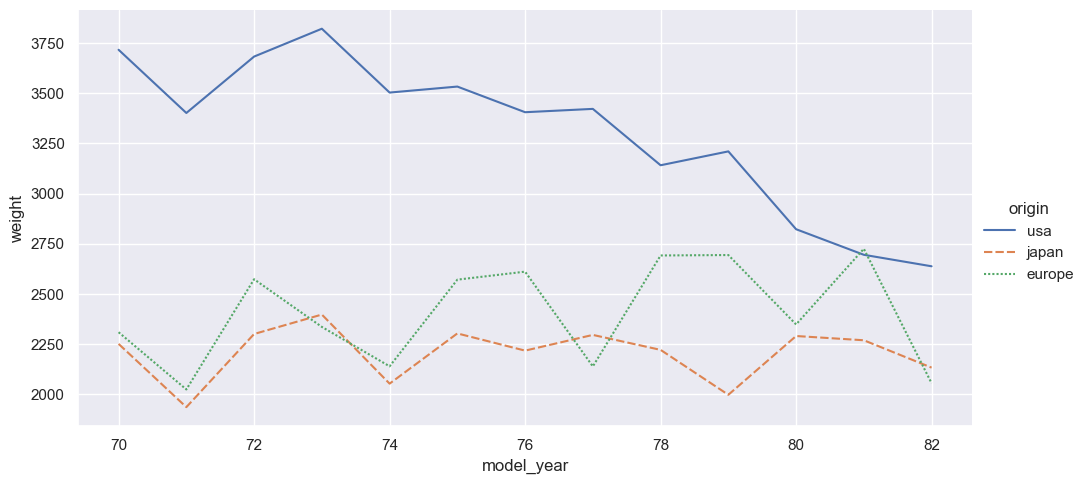

In [78]:
sns.relplot(x="model_year", y="weight", data=mpg, kind="line",aspect=2, hue="origin", style="origin", errorbar=None)
plt.show()

___
### Test Questions

**Q: Use `relplot()` and the `mpg` DataFrame to create a line plot with "`model_year`" on the x-axis and "`mpg`" on the y-axis.**

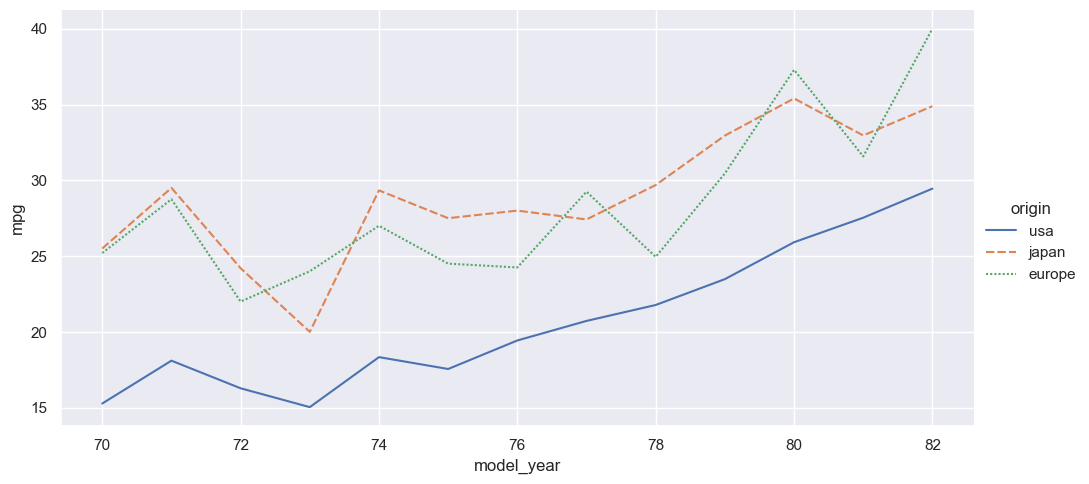

In [79]:
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line",aspect=2, hue="origin", style="origin", errorbar=None)
plt.show()

> Observation:
____
**Q: Now analyzing how has the average hp for the cars changed over time. And does this trend differ by country of origin?**


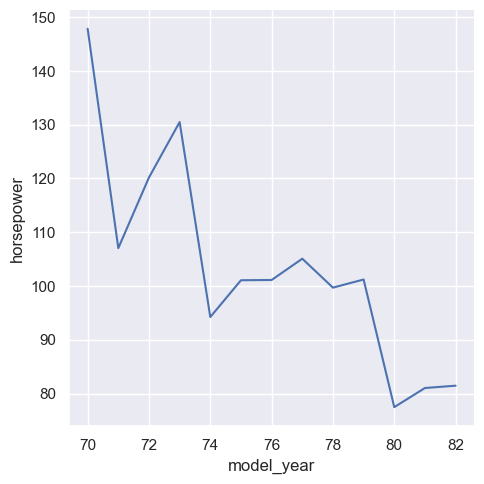

In [83]:
sns.relplot(kind="line", x="model_year",y="horsepower", data=mpg , errorbar=None)
plt.show()

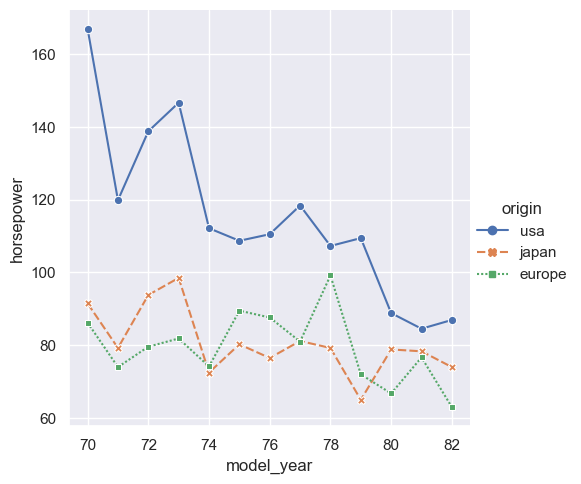

In [87]:
sns.relplot(kind="line", x="model_year",y="horsepower", data=mpg , errorbar=None, hue="origin", dashes=True,markers=True, style="origin")
plt.show()

> Observations:

____
# Visualizing a categorical & a Quantitative variable